<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/MulticlassTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])

In [ ]:
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [ ]:
category = pd.get_dummies(df.genre)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='genre')
df_new

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [ ]:
synopsis = df_new['ringkasan_sinopsis'].values
label = df_new[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values


In [ ]:
from sklearn.model_selection import train_test_split
syn_train, syn_test, label_train, label_test = train_test_split(synopsis, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(syn_train) 
tokenizer.fit_on_texts(syn_test)

seq_train = tokenizer.texts_to_sequences(syn_train)
seq_test = tokenizer.texts_to_sequences(syn_test)

pad_train = pad_sequences(seq_train)
pad_test = pad_sequences(seq_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(pad_train, label_train, epochs=num_epochs, 
                    validation_data=(pad_test, label_test), verbose=2)


Epoch 1/30
26/26 - 26s - loss: 1.6101 - accuracy: 0.1803 - val_loss: 1.6098 - val_accuracy: 0.2040
Epoch 2/30
26/26 - 28s - loss: 1.6060 - accuracy: 0.2164 - val_loss: 1.6078 - val_accuracy: 0.1791
Epoch 3/30
26/26 - 28s - loss: 1.5792 - accuracy: 0.3371 - val_loss: 1.5891 - val_accuracy: 0.3234
Epoch 4/30
26/26 - 27s - loss: 1.3518 - accuracy: 0.4502 - val_loss: 1.5873 - val_accuracy: 0.2836
Epoch 5/30
26/26 - 27s - loss: 1.0429 - accuracy: 0.5759 - val_loss: 1.9038 - val_accuracy: 0.2637
Epoch 6/30
26/26 - 29s - loss: 0.7956 - accuracy: 0.7139 - val_loss: 2.1233 - val_accuracy: 0.2786
Epoch 7/30
26/26 - 28s - loss: 0.5010 - accuracy: 0.8308 - val_loss: 2.9538 - val_accuracy: 0.2736
Epoch 8/30
26/26 - 28s - loss: 0.2413 - accuracy: 0.9378 - val_loss: 3.1712 - val_accuracy: 0.2736
Epoch 9/30
26/26 - 27s - loss: 0.1644 - accuracy: 0.9527 - val_loss: 3.4416 - val_accuracy: 0.3035
Epoch 10/30
26/26 - 28s - loss: 0.1560 - accuracy: 0.9540 - val_loss: 5.8595 - val_accuracy: 0.3184
Epoch 11/

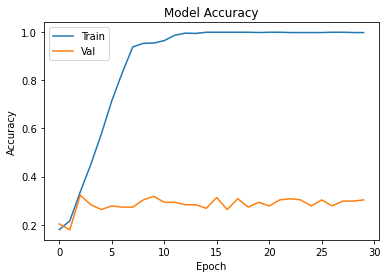

In [ ]:
import matplotlib.pyplot as plt

#Visualize the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

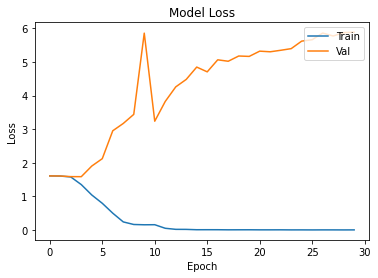

In [ ]:
#Visualize the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
